In [1]:
!pip install TPOT

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=8d76bd2ad9c3df616b21169f791ed9dd96aff68d093b91afc047c0d361f08c96
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Traditional Model of Machie Learning

In [2]:
from sklearn.datasets import load_breast_cancer

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [17]:
model = DecisionTreeClassifier()

In [18]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [19]:
acc = accuracy_score(y_test, y_pred)

In [20]:
print(acc)

0.9385964912280702


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

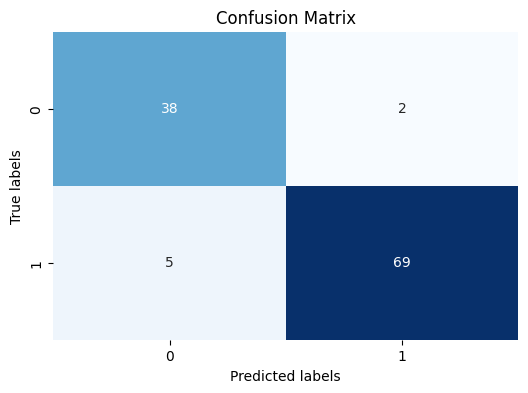

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# AutoML using TPOT

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

In [28]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 12)

In [41]:
tpot = TPOTClassifier(generations=4, population_size=60, random_state= 12)
tpot.fit(X_train, y_train)

TPOTClassifier(generations=4, population_size=60, random_state=12)

In [42]:
accur = tpot.score(X_test, y_test)

In [43]:
print(accur)

0.9649122807017544


In [44]:
tpot.export('breast_cancer_detection_pipeline.py')